In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#The data is loaded.(Pima Indians Diabetes Database)

data=pd.read_csv("D:\data para proyectos\diabetes.csv")
data.shape


(768, 9)

In [2]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Selecting the Object type columns (Regularly Dates and Texts)
categorical_features = list(data.select_dtypes(include='object').columns)
print(categorical_features)

[]


In [5]:
# We obtain the numerical variables but by negation (those that are not objects)
numerical_features = list(data.select_dtypes(exclude='object').columns)
print(numerical_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [6]:
#we observe null values of categorical variables
data[categorical_features].isnull().any()

Series([], dtype: bool)

In [7]:
# the categories which have nulls (we get date and location "Does not have nulls")
categorical=data[categorical_features].columns[2:]
categorical

Index([], dtype='object')

In [8]:
# We substitute for categorical variables with the first value of all
for i in categorical:
    data[i].fillna(data[i].value_counts().index[0],inplace=True)
    #validating that the substitution of the values ​​is done.
data[categorical_features].isnull().any()

Series([], dtype: bool)

In [9]:
# We fill the empty values with the mean
for i in numerical_features:
    data[i]=data[i].fillna(data[i].mean())
# Validating 
data[numerical_features].isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
# Validation if any null value exists in the df
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
# We get the time values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

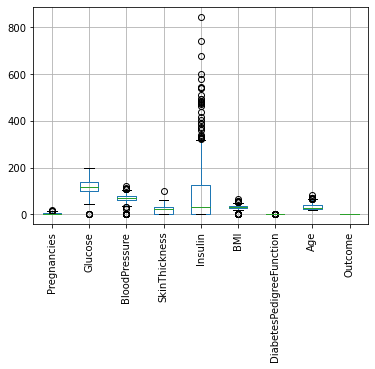

In [12]:
# We analyze atypical data
data.boxplot(rot=90)

In [13]:
#We separate into variables (X= all except if it is going to rain today) and objective (Y= it is going to rain or not)
x = data.drop(['Outcome'],axis=1).values # .values convierte en  Objeto de numpy
y = data['Outcome'].values

In [14]:
 # We separate into Test and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100) 

In [15]:
# We scale the 2 sets of variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

 1) Glucose                        0.271583
 2) BMI                            0.157351
 3) Age                            0.140097
 4) DiabetesPedigreeFunction       0.125294
 5) Pregnancies                    0.085153
 6) BloodPressure                  0.085083
 7) SkinThickness                  0.070096
 8) Insulin                        0.065344


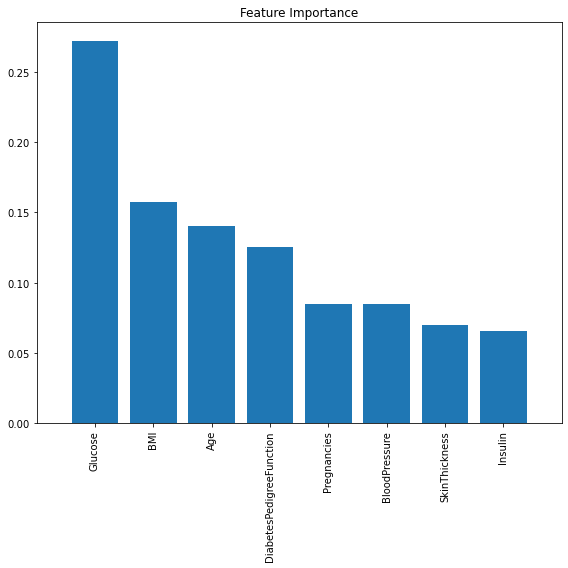

In [16]:
# Let's see how much each variable contributes to the model
from sklearn.ensemble import RandomForestClassifier

feat_labels = data.columns[:-1]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1,n_jobs=-1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize = (8, 8))    
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, 
                                  metric = "minkowski",#generalization of distances (euclideas and manhathan) 
                                  p = 2)
classifier.fit(x_train, y_train)
# Predicting results with the Testing Set
y_pred  = classifier.predict(x_test)

In [18]:
# DF accuracy With this model and (all variables)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"%")
print("__________________")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("matriz de confusión \n",cm)
print("__________________")

# Valores
TP = cm[0,0]# True Positive
TN = cm[1,1]# True Negative
FP = cm[0,1]# False Positive 
FN = cm[1,0]# False Negative 

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Exactitud de calsificación :",classification_accuracy)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Error de clasificación :",classification_error)
recall = TP / float(TP + FN)
print("Recall :",recall)
print("__________________")

from sklearn.metrics import classification_report
print("Reporte de clasificación \n",classification_report(y_test, y_pred))

70.995670995671 %
__________________
matriz de confusión 
 [[121  29]
 [ 38  43]]
__________________
Exactitud de calsificación : 0.70995670995671
Error de clasificación : 0.29004329004329005
Recall : 0.7610062893081762
__________________
Reporte de clasificación 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       150
           1       0.60      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



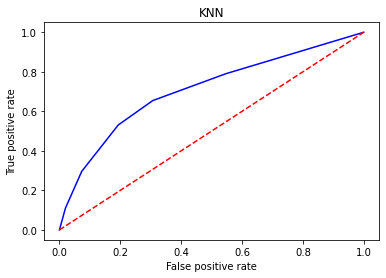

AUC 0.7078600823045267


In [19]:
#ROC curve (KNN)
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier.predict_proba(x_test)[:,1]

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,'b', label='KNN')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN')
plt.show()

print('AUC', roc_auc_score(y_test,y_pred_prob))

In [20]:
# Adjust the classifier in the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf",probability=True, random_state = 0)
classifier.fit(x_train, y_train)

# Predicting results with the Testing Set
y_pred  = classifier.predict(x_test)

In [21]:
# DF accuracy With this model and (all variables)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"%")
print("__________________")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("matriz de confusión \n",cm)
print("__________________")

# Valores
TP = cm[0,0]# True Positive
TN = cm[1,1]# True Negative
FP = cm[0,1]# False Positive 
FN = cm[1,0]# False Negative 

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Exactitud de calsificación :",classification_accuracy)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Error de clasificación :",classification_error)
recall = TP / float(TP + FN)
print("Recall :",recall)
print("__________________")

from sklearn.metrics import classification_report
print("Reporte de clasificación \n",classification_report(y_test, y_pred))

74.02597402597402 %
__________________
matriz de confusión 
 [[124  26]
 [ 34  47]]
__________________
Exactitud de calsificación : 0.7402597402597403
Error de clasificación : 0.2597402597402597
Recall : 0.7848101265822784
__________________
Reporte de clasificación 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



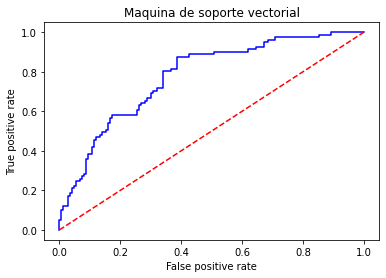

AUC 0.7777777777777778


In [22]:
# ROC curve (SVM)
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier.predict_proba(x_test)[:,1]

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,'b', label='SVM')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Maquina de soporte vectorial')
plt.show()

print('AUC', roc_auc_score(y_test,y_pred_prob))

In [23]:
# Adjust the Decision Tree classifier in the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train, y_train)
# We predict 
y_pred  = classifier.predict(x_test)

In [24]:
# DF accuracy With this model and (all variables)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"%")
print("__________________")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("matriz de confusión \n",cm)
print("__________________")

# Valores
TP = cm[0,0]# True Positive
TN = cm[1,1]# True Negative
FP = cm[0,1]# False Positive 
FN = cm[1,0]# False Negative 

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Exactitud de calsificación :",classification_accuracy)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Error de clasificación :",classification_error)
recall = TP / float(TP + FN)# Recordar
print("Recall :",recall)
print("__________________")

from sklearn.metrics import classification_report
print("Reporte de clasificación \n",classification_report(y_test, y_pred))

68.83116883116884 %
__________________
matriz de confusión 
 [[112  38]
 [ 34  47]]
__________________
Exactitud de calsificación : 0.6883116883116883
Error de clasificación : 0.3116883116883117
Recall : 0.7671232876712328
__________________
Reporte de clasificación 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       150
           1       0.55      0.58      0.57        81

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



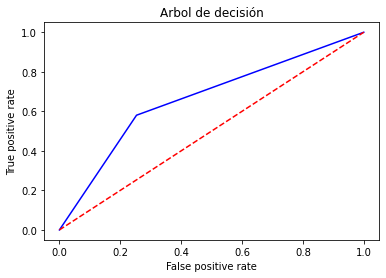

AUC 0.6634567901234567


In [25]:
# ROC curve (Decision tree)
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier.predict_proba(x_test)[:,1]

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,'b', label='Arbol de desición')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Arbol de decisión')
plt.show()

print('AUC', roc_auc_score(y_test,y_pred_prob))

In [26]:
# Adjust the Random Forest classifier on the Training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = "entropy", random_state = 0)
classifier.fit(x_train, y_train)

# Predicting results with the Testing Set
y_pred  = classifier.predict(x_test)

In [27]:
# DF accuracy With this model and (all variables)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"%")
print("__________________")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("matriz de confusión \n",cm)
print("__________________")

TP = cm[0,0]# True Positive
TN = cm[1,1]# True Negative
FP = cm[0,1]# False Positive 
FN = cm[1,0]# False Negative 

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Exactitud de calsificación :",classification_accuracy)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Error de clasificación :",classification_error)
recall = TP / float(TP + FN)
print("Recall :",recall)
print("__________________")

from sklearn.metrics import classification_report
print("Reporte de clasificación \n",classification_report(y_test, y_pred))

72.72727272727273 %
__________________
matriz de confusión 
 [[124  26]
 [ 37  44]]
__________________
Exactitud de calsificación : 0.7272727272727273
Error de clasificación : 0.2727272727272727
Recall : 0.7701863354037267
__________________
Reporte de clasificación 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       150
           1       0.63      0.54      0.58        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



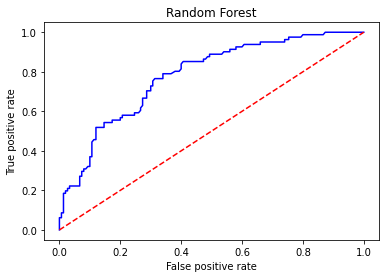

AUC 0.7795061728395061


In [28]:
# ROC curve (SVM)
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier.predict_proba(x_test)[:,1]

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,'b', label='Random Forest')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

print('AUC', roc_auc_score(y_test,y_pred_prob))

In [29]:
# Fit the XGBoost model to the Training Set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

# Predicting results with the Testing Set
y_pred  = classifier.predict(x_test)

In [30]:
# DF accuracy With this model and (all variables)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"%")
print("__________________")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("matriz de confusión \n",cm)
print("__________________")

TP = cm[0,0]# True Positive
TN = cm[1,1]# True Negative
FP = cm[0,1]# False Positive 
FN = cm[1,0]# False Negative 

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print("Exactitud de calsificación :",classification_accuracy)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Error de clasificación :",classification_error)
recall = TP / float(TP + FN)# Recordar
print("Recall :",recall)
print("__________________")

from sklearn.metrics import classification_report
print("Reporte de clasificación \n",classification_report(y_test, y_pred))

71.86147186147186 %
__________________
matriz de confusión 
 [[119  31]
 [ 34  47]]
__________________
Exactitud de calsificación : 0.7186147186147186
Error de clasificación : 0.2813852813852814
Recall : 0.7777777777777778
__________________
Reporte de clasificación 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       150
           1       0.60      0.58      0.59        81

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



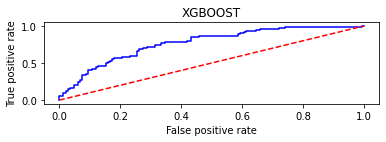

AUC 0.7702057613168724


In [35]:
# ROC curve (XGBOOST)
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = classifier.predict_proba(x_test)[:,1]

fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)
plt.figure().set_figheight(1.5)
plt.plot(fpr,tpr,'b', label='Xbost')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBOOST')
plt.show()

print('AUC', roc_auc_score(y_test,y_pred_prob))